In [16]:
import pandas as pd

In [ ]:
!pip install -U pandasql

In [10]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [11]:
from pandasql import sqldf

In [7]:
mysql = lambda q: sqldf(q, globals())

In [18]:
user= pd.read_csv('users.csv')
event= pd.read_csv('events.csv')

In [50]:
#how many steps users complete before dropping off?
dropoff = """
SELECT num_of_events, count(*) as num_of_users FROM
(SELECT distinct  
user_id, event_name, row_number() over (partition by user_id order by event_timestamp) as num_of_events
FROM event
GROUP BY user_id,event_name)
GROUP BY num_of_events
"""

In [42]:
#how many steps users complete before dropping off?
# , case when partner_name ='Shift21' THEN count(distinct user_id) ELSE NULL END AS shift21_user
# , case when partner_name ='EasyWork' THEN count(distinct user_id) ELSE NULL END AS easywork_user
# , case when partner_name ='AttendTrack' THEN count(distinct user_id) ELSE NULL END AS attendtrack_user
dropoffdetail = """
SELECT num_of_events
, partner_name
, count(*)
FROM
(SELECT distinct  
e.user_id, event_name, partner_name, row_number() over (partition by e.user_id order by event_timestamp) as num_of_events
FROM event e
LEFT JOIN user u ON  e.user_id=u.user_id
GROUP BY e.user_id,event_name, partner_name)
GROUP BY num_of_events,partner_name
"""

In [49]:
mysql(dropoffdetail)

,num_of_events,partner_name,count(*)
0,1,AttendTrack,1
1,1,EasyWork,10
2,1,Shift21,183
3,2,AttendTrack,1
4,2,EasyWork,7
5,2,Shift21,139
6,3,AttendTrack,1
7,3,EasyWork,4
8,3,Shift21,70
9,4,EasyWork,1


In [41]:
mysql("select distinct partner_name, count(*) from user group by partner_name ")

,partner_name,count(*)
0,AttendTrack,1
1,EasyWork,10
2,Shift21,183


In [ ]:
mysql(dropoff)

In [2]:
import plotly.express as px

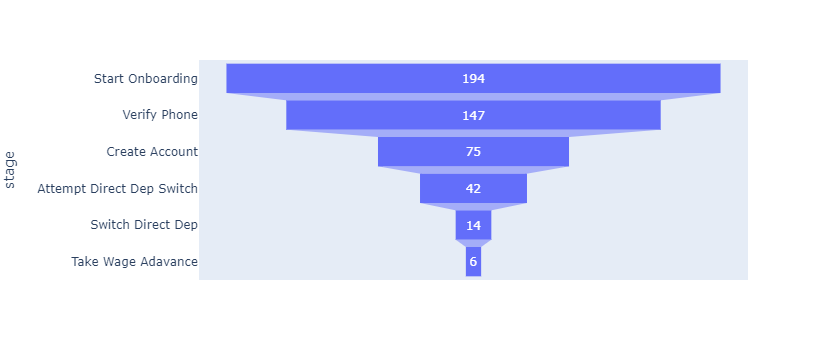

In [5]:
data = dict(
    users=[194, 147, 75, 42, 14, 6],
    stage=["Start Onboarding", "Verify Phone", "Create Account", "Attempt Direct Dep Switch", "Switch Direct Dep", "Take Wage Adavance"])
fig = px.funnel(data, x='users', y='stage')
fig.show()

In [26]:
mysql("SELECT * FROM event where user_id='3000'")

,user_id,event_name,event_timestamp
0,3000,start_onboarding,2021-12-03T20:54:42.311Z
1,3000,verify_phone_number,2021-12-03T20:56:28.732Z
2,3000,create_account,2021-12-03T20:59:14.226Z
3,3000,attempt_direct_deposit_switch,2021-12-09T20:18:43.149Z
4,3000,switch_direct_deposit,2021-12-13T15:07:40.657Z
5,3000,take_wage_advance,2021-12-13T15:08:27.521Z
